In [1]:
import os
import pandas as pd
os.getcwd()

'/home/jupyter/nft/nft_capstone'

## Load Data

In [2]:
df_sellernetwork = pd.read_pickle('https://storage.googleapis.com/nft_capstone_datafiles/df_sellernetwork.pkl')
df_buyernetwork = pd.read_pickle('https://storage.googleapis.com/nft_capstone_datafiles/df_buyernetwork.pkl')

# import gcsfs, pickle

# fs = gcsfs.GCSFileSystem(project = 'w210-339016')
# fs.ls('nft_capstone_datafiles')

# with fs.open('nft_capstone_datafiles/df_sellernetwork.pkl', 'rb') as file:
#     df_sellernetwork = pickle.load(file)

# with fs.open('nft_capstone_datafiles/df_buyernetwork.pkl', 'rb') as file:
#     df_buyernetwork = pickle.load(file)

In [3]:
print(len(df_sellernetwork))
print(len(df_buyernetwork))

2991602
2991602


In [4]:
import networkx as nx

# create seller network
dg_sellernetwork = nx.from_pandas_edgelist(df_sellernetwork, 'Seller_address', 'Buyer_address', True, nx.DiGraph())

In [5]:
list(dg_sellernetwork.nodes)[:10]

['...bu.wam',
 'kilb2.wam',
 '...c.wam',
 'd.fqu.wam',
 '...rc.wam',
 '.v.qy.wam',
 '5jtra.wam',
 'bbubg.wam',
 'dk1re.wam',
 'jq.m2.wam']

In [6]:
list(dg_sellernetwork.edges)[:10]

[('...bu.wam', 'kilb2.wam'),
 ('...c.wam', 'd.fqu.wam'),
 ('d.fqu.wam', '3pfba.wam'),
 ('d.fqu.wam', '5yvbw.wam'),
 ('d.fqu.wam', 'bxar4.wam'),
 ('d.fqu.wam', 'crhbe.wam'),
 ('d.fqu.wam', 'dfxb2.wam'),
 ('d.fqu.wam', 'ef5bi.wam'),
 ('d.fqu.wam', 'fn1sa.wam'),
 ('d.fqu.wam', 'fu3bq.wam')]

In [7]:
list(dg_sellernetwork.adj['d.fqu.wam'])

['3pfba.wam',
 '5yvbw.wam',
 'bxar4.wam',
 'crhbe.wam',
 'dfxb2.wam',
 'ef5bi.wam',
 'fn1sa.wam',
 'fu3bq.wam',
 'gwxbc.wam',
 'hejru.wam',
 'j5gba.wam',
 'kp5qw.wam',
 'mhbbo.wam',
 'sjiau.waa',
 'xaray.wam',
 'yhrba.wam',
 'ynnr.wam']

In [8]:
dg_sellernetwork.degree['d.fqu.wam']

522

In [9]:
deg_centrality_seller = nx.degree_centrality(dg_sellernetwork)

In [10]:
len(deg_centrality_seller.values())

532945

In [11]:
pgrank_seller = nx.pagerank(dg_sellernetwork, alpha = 0.8)

In [12]:
print(len(pgrank_seller))
print(deg_centrality_seller['kilb2.wam'])
print(pgrank_seller['kilb2.wam'])

532945
0.0013022006064427032
0.0002897145514934514


In [13]:
# create buyer network
dg_buyernetwork = nx.from_pandas_edgelist(df_buyernetwork, 'Buyer_address', 'Seller_address', True, nx.DiGraph())
print(list(dg_buyernetwork.nodes)[:10])
print(list(dg_buyernetwork.edges)[:10])
# print(list(dg_buyernetwork.adj['d.fqu.wam']))
print(dg_buyernetwork.degree['d.fqu.wam'])

['...rc.wam', 'egnqy.waa', 'nbxqy.wam', '..1s.wam', 'o1lbu.wam', '..24.wam', '4u.b2.wam', '5zfqw.wam', 'brnqw.wam', 'kkbaw.wam']
[('...rc.wam', 'egnqy.waa'), ('...rc.wam', 'nbxqy.wam'), ('nbxqy.wam', '45uqy.wam'), ('..1s.wam', 'o1lbu.wam'), ('..24.wam', '4u.b2.wam'), ('..24.wam', '5zfqw.wam'), ('..24.wam', 'brnqw.wam'), ('..24.wam', 'kkbaw.wam'), ('..24.wam', 'nkyqy.wam'), ('..24.wam', 'olnay.wam')]
522


In [14]:
deg_centrality_buyer = nx.degree_centrality(dg_buyernetwork)
len(deg_centrality_buyer)

532945

In [15]:
pgrank_buyer = nx.pagerank(dg_buyernetwork, alpha = 0.8)
len(pgrank_buyer)

532945

In [16]:
print(deg_centrality_buyer['kilb2.wam'])
print(pgrank_buyer['kilb2.wam'])

0.0013022006064427032
7.669013374651661e-07


## Create dataframe of network values

In [18]:
print(type(deg_centrality_seller))
print(type(pgrank_seller))
print(type(deg_centrality_buyer))
print(type(pgrank_buyer))

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


In [19]:
df_network_centrality_seller = pd.DataFrame(list(deg_centrality_seller.items()), columns=['Seller_address', 'deg_centrality_seller'])
df_network_pgrank_seller = pd.DataFrame(list(pgrank_seller.items()), columns=['Seller_address', 'pgrank_seller'])
df_network_centrality_buyer = pd.DataFrame(list(deg_centrality_buyer.items()), columns=['Buyer_address', 'deg_centrality_buyer'])
df_network_pgrank_buyer = pd.DataFrame(list(pgrank_buyer.items()), columns=['Buyer_address', 'pgrank_buyer'])

In [20]:
df_network_centrality_seller.head(5)

,Seller_address,deg_centrality_seller
0,...bu.wam,0.000002
1,kilb2.wam,0.001302
2,...c.wam,0.000002
3,d.fqu.wam,0.000979
4,...rc.wam,0.000017


In [21]:
df_network_pgrank_seller.head(5)

,Seller_address,pgrank_seller
0,...bu.wam,8.762884e-07
1,kilb2.wam,2.897146e-04
2,...c.wam,8.762884e-07
3,d.fqu.wam,2.262939e-04
4,...rc.wam,1.075619e-06


In [22]:
df_network_centrality_buyer.head(5)

,Buyer_address,deg_centrality_buyer
0,...rc.wam,0.000017
1,egnqy.waa,0.000008
2,nbxqy.wam,0.004738
3,..1s.wam,0.000002
4,o1lbu.wam,0.000002


In [23]:
df_network_pgrank_buyer.head(5)

,Buyer_address,pgrank_buyer
0,...rc.wam,1.236485e-06
1,egnqy.waa,2.649662e-06
2,nbxqy.wam,8.349081e-04
3,..1s.wam,7.669013e-07
4,o1lbu.wam,1.460536e-06


In [24]:
# merge with sellernetwork
df_sellernetwork_values = pd.merge(df_sellernetwork, df_network_centrality_seller, on='Seller_address', how='left')
df_sellernetwork_values = pd.merge(df_sellernetwork_values, df_network_pgrank_seller, on='Seller_address', how='left')
df_sellernetwork_values.head(5)

,Seller_address,Buyer_address,trans_count,deg_centrality_seller,pgrank_seller
0,...bu.wam,kilb2.wam,1,0.000002,8.762884e-07
1,...c.wam,d.fqu.wam,1,0.000002,8.762884e-07
2,...rc.wam,.v.qy.wam,1,0.000017,1.075619e-06
3,...rc.wam,5jtra.wam,1,0.000017,1.075619e-06
4,...rc.wam,bbubg.wam,1,0.000017,1.075619e-06


In [25]:
print(len(df_sellernetwork))
print(len(df_sellernetwork_values))

2991602
2991602


In [26]:
# merge with buyernetwork
df_buyernetwork_values = pd.merge(df_buyernetwork, df_network_centrality_buyer, on='Buyer_address', how='left')
df_buyernetwork_values = pd.merge(df_buyernetwork_values, df_network_pgrank_buyer, on='Buyer_address', how='left')
df_buyernetwork_values.head(5)

,Buyer_address,Seller_address,trans_count,deg_centrality_buyer,pgrank_buyer
0,...rc.wam,egnqy.waa,1,0.000017,1.236485e-06
1,...rc.wam,nbxqy.wam,2,0.000017,1.236485e-06
2,..1s.wam,o1lbu.wam,1,0.000002,7.669013e-07
3,..24.wam,4u.b2.wam,1,0.000028,1.304048e-06
4,..24.wam,5zfqw.wam,1,0.000028,1.304048e-06


In [27]:
print(len(df_buyernetwork))
print(len(df_buyernetwork_values))

2991602
2991602


In [29]:
print(df_sellernetwork_values.index.nunique())
print(df_buyernetwork_values.index.nunique())

2991602
2991602


In [30]:
print(df_sellernetwork.columns)
print(df_sellernetwork_values.columns)
print(df_buyernetwork.columns)
print(df_buyernetwork_values.columns)

Index(['Seller_address', 'Buyer_address', 'trans_count'], dtype='object')
Index(['Seller_address', 'Buyer_address', 'trans_count',
       'deg_centrality_seller', 'pgrank_seller'],
      dtype='object')
Index(['Buyer_address', 'Seller_address', 'trans_count'], dtype='object')
Index(['Buyer_address', 'Seller_address', 'trans_count',
       'deg_centrality_buyer', 'pgrank_buyer'],
      dtype='object')


In [34]:
df_network_values = pd.merge(df_sellernetwork, df_sellernetwork_values, how='left', on=['Seller_address', 'Buyer_address', 'trans_count']).rename(columns={'trans_count': 'trans_count_seller'})
df_network_values = pd.merge(df_network_values, df_buyernetwork_values, how='left', on=['Seller_address', 'Buyer_address']).rename(columns={'trans_count': 'trans_count_buyer'})
print(len(df_network_values))
df_network_values.head(5)

2991602


,Seller_address,Buyer_address,trans_count_seller,deg_centrality_seller,pgrank_seller,trans_count_buyer,deg_centrality_buyer,pgrank_buyer
0,...bu.wam,kilb2.wam,1,0.000002,8.762884e-07,1,0.001302,7.669013e-07
1,...c.wam,d.fqu.wam,1,0.000002,8.762884e-07,1,0.000979,2.953358e-06
2,...rc.wam,.v.qy.wam,1,0.000017,1.075619e-06,1,0.001372,6.215006e-06
3,...rc.wam,5jtra.wam,1,0.000017,1.075619e-06,1,0.000203,1.874846e-06
4,...rc.wam,bbubg.wam,1,0.000017,1.075619e-06,1,0.000008,7.669013e-07


In [36]:
df_network_values.tail(5)

,Seller_address,Buyer_address,trans_count_seller,deg_centrality_seller,pgrank_seller,trans_count_buyer,deg_centrality_buyer,pgrank_buyer
2991597,zzzr.wam,vbequ.wam,1,0.000375,0.00002,1,0.002790,0.000085
2991598,zzzr.wam,x4iqw.wam,2,0.000375,0.00002,2,0.002100,0.000017
2991599,zzzr.wam,xdfqy.wam,1,0.000375,0.00002,1,0.000242,0.000014
2991600,zzzr.wam,xjsb2.wam,1,0.000375,0.00002,1,0.000274,0.000001
2991601,zzzr.wam,ybub.wam,2,0.000375,0.00002,2,0.001852,0.000173


## Write Network Values to pickle file

In [35]:
df_network_values.to_pickle('df_network_values.pkl')

## Network Graph

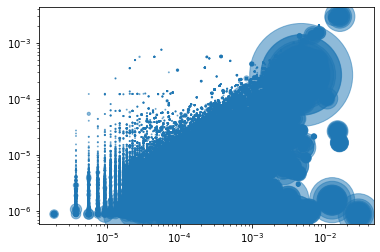

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
# np.random.seed(19680801)


# N = 50
x = df_network_values.deg_centrality_seller
y = df_network_values.pgrank_seller
# colors = np.random.rand(N)
area = df_network_values.trans_count_seller  # 0 to 15 point radii

plt.xscale('log')
plt.yscale('log')
plt.scatter(x, y, s=area, alpha=0.5)
plt.show()

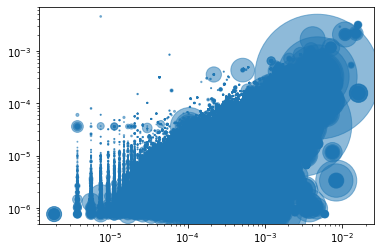

In [40]:
x = df_network_values.deg_centrality_buyer
y = df_network_values.pgrank_buyer
# colors = np.random.rand(N)
area = df_network_values.trans_count_buyer  # 0 to 15 point radii

plt.xscale('log')
plt.yscale('log')
plt.scatter(x, y, s=area, alpha=0.5)
plt.show()

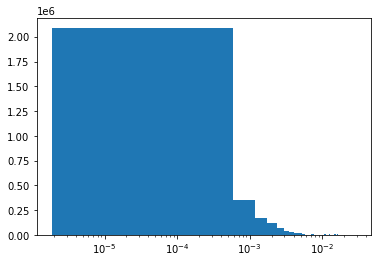

In [47]:
data = df_network_values.deg_centrality_seller
plt.xscale('log')
# plt.yscale('log')
plt.hist(data, bins = 50)
plt.show()

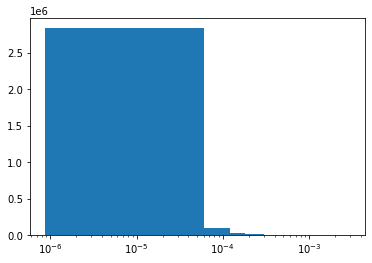

In [48]:
data = df_network_values.pgrank_seller
plt.xscale('log')
# plt.yscale('log')
plt.hist(data, bins = 50)
plt.show()

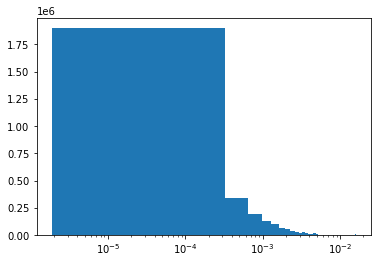

In [49]:
data = df_network_values.deg_centrality_buyer
plt.xscale('log')
# plt.yscale('log')
plt.hist(data, bins = 50)
plt.show()

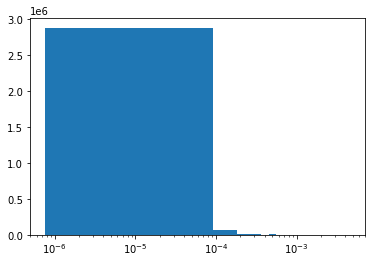

In [50]:
data = df_network_values.pgrank_buyer
plt.xscale('log')
# plt.yscale('log')
plt.hist(data, bins = 50)
plt.show()

In [ ]:
# import altair as alt

# alt.data_transformers.disable_max_rows()

# source = df_network_values

# alt.Chart(source).mark_circle().encode(
#     x=alt.X('Category:N'), #, axis=alt.Axis(format='~s')
#     y=alt.Y(
#         'sum(ID_token):Q',
#         title='Num_assets',
#         scale=alt.Scale(type='log')
#     ),
#     facet=alt.Facet('Collection_cleaned:N', columns=6),
#     size='sum(ID_token):Q',
#     color='Category:N'
# ).properties(
#     title='Unique tokens by Category and Collection',
#     width=90,
#     height=80
# ).configure_axis(grid=False)